# A Comparative Analysis of Improvisation in Electronic and Acoustic Music

For the subsequent analysis, Python’s Librosa library will be employed to perform several key tasks.\
These include:\
Tempo and Beat Detection\
Onset Detection\
MFCC (Mel-frequency Cepstral Coefficients)\
Loudness (RMS Energy)\
Spectral Centroid (an indication of dynamic range)

In [1]:
# importing the necessary libraries

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Loading the audio file of an electronic improvisation

audio_file_el = 'Noto_Rack.wav'
y_el, sr_el = librosa.load(audio_file_el)

# sanity check to see if the file was loaded correctly:
print(f"Audio signal of electronic improvisation shape: {y_el.shape}")
print(f"Sample rate of electronic improvisation: {sr_el}")

# Do the same with an acoustic improvisation

audio_file_ac = '15_12_22.wav'
y_ac, sr_ac = librosa.load(audio_file_ac)

# sanity check to see if the file was loaded correctly:
print(f"Audio signal shape of acoustic improvisation: {y_ac.shape}")
print(f"Sample rate of acoustic improvisation: {sr_ac}")

Audio signal of electronic improvisation shape: (1963162,)
Sample rate of electronic improvisation: 22050
Audio signal shape of acoustic improvisation: (2822400,)
Sample rate of acoustic improvisation: 22050


## Data Analysis
The first analyses conducted will focus on the detection of beats and tempo, as well as the identification of onsets. The latter method is particularly useful for examining the rhythmic characteristics and precision of the performance.

In [123]:
# Perform Tempo and Beat Dedection on Electronic Improvisation
tempo_el, beats_el = librosa.beat.beat_track(y=y_el, sr=sr_el)

# Tempo comes as a list but a floating point number is preferred
tempo_el = tempo_el[0]

print(f"The tempo of the electronic improvisation is: {tempo_el} Beats Per Minute (BPM)")

The tempo of the electronic improvisation is: 123.046875 Beats Per Minute (BPM)


In [124]:
# Perform Tempo and Beat Dedection on Electronic Improvisation
tempo_ac, beats_ac = librosa.beat.beat_track(y=y_ac, sr=sr_ac)

# Tempo comes as a list but a floating point number is preferred
tempo_ac = tempo_ac[0]

print(f"The tempo of the acoustic improvisation is: {tempo_ac} Beats Per Minute (BPM)")

The tempo of the acoustic improvisation is: 107.666015625 Beats Per Minute (BPM)


In [57]:
# Perform Onset Detection on the Electronic Improvisation

onset_frames_el = librosa.onset.onset_detect(y=y_el, sr=sr_el)
onset_times_el = librosa.frames_to_time(onset_frames_el, sr=sr_el)

In [58]:
# Perform Onset Detection on the Acoustic Improvisation

onset_frames_ac = librosa.onset.onset_detect(y=y_ac, sr=sr_ac)
onset_times_ac = librosa.frames_to_time(onset_frames_ac, sr=sr_ac)

Next, the Mel-frequency Cepstral Coefficients (MFCCs) are calculated for later visualization, providing valuable information about the frequency content of an audio file.

In [125]:
# MFCC (Mel-frequency Cepstral Coefficients) for Electronic Improvisation

mfccs_el = librosa.feature.mfcc(y=y_el, sr=sr_el, n_mfcc=13)
#printing shape as sanity check
print(f"Electronic MFCCs Shape: {mfccs_el.shape}")

Electronic MFCCs Shape: (13, 3835)


In [126]:
# MFCC (Mel-frequency Cepstral Coefficients) for Acoustic Improvisation

mfccs_ac = librosa.feature.mfcc(y=y_ac, sr=sr_ac, n_mfcc=13)
#printing shape as sanity check
print(f"Acoustic MFCCs Shape: {mfccs_ac.shape}")

Acoustic MFCCs Shape: (13, 5513)


The following analyses will focus on the dynamic range and loudness of the selected improvisations.

In [98]:
# Loudness (RMS Energy) of Electronic Improvisation

rms_el = librosa.feature.rms(y=y_el)
print(f"Loudness (RMS Energy) of Electronic Improvisaiton: {rms_el}")

Loudness (RMS Energy) of Electronic Improvisaiton: [[1.4311370e-01 1.6062765e-01 1.7459781e-01 ... 7.4016389e-06
  6.7139854e-06 5.5453911e-06]]


In [48]:
# Loudness (RMS Energy) of Acoustic Improvisation

rms_ac = librosa.feature.rms(y=y_ac)
print(f"Loudness (RMS Energy) of Acoustic Improvisation: {rms_ac}")


Loudness (RMS Energy) of Acoustic Improvisation: [[6.2748644e-05 1.1121030e-04 2.2677334e-04 ... 7.8846388e-06
  7.4966019e-06 6.3959478e-06]]


In [94]:
# Spectral Centroid of Electronic Improvisation

# calculate Spectral Centroid parameters
spectral_centroids_el = librosa.feature.spectral_centroid(y=y_el, sr=sr_el)

S_el, phase_el = librosa.magphase(librosa.stft(y=y_el))

freqs_el, times_el, D_el = librosa.reassigned_spectrogram(y_el, fill_nan=True)

# print shape as sanity check
print(f"Spectral Centroid Shape of Electronic Imprvisation: {spectral_centroids_el.shape}")


Spectral Centroid Shape of Electronic Imprvisation: (1, 3835)


In [95]:
# Spectral Centroid of Acoustic Improvisation

# calculate Spectral Centroid parameters
spectral_centroids_ac = librosa.feature.spectral_centroid(y=y_ac, sr=sr_ac)

S_ac, phase_ac = librosa.magphase(librosa.stft(y=y_ac))

freqs_ac, times_ac, D_ac = librosa.reassigned_spectrogram(y_ac, fill_nan=True)

# print shape as sanity check
print(f"Spectral Centroid Shape of Electronic Imprvisation: {spectral_centroids_ac.shape}")

Spectral Centroid Shape of Electronic Imprvisation: (1, 5513)


## Visualizations

To enhance the comprehensibility of the data obtained from the processes above, several visualizations are employed.

#### Comparing the Waveforms

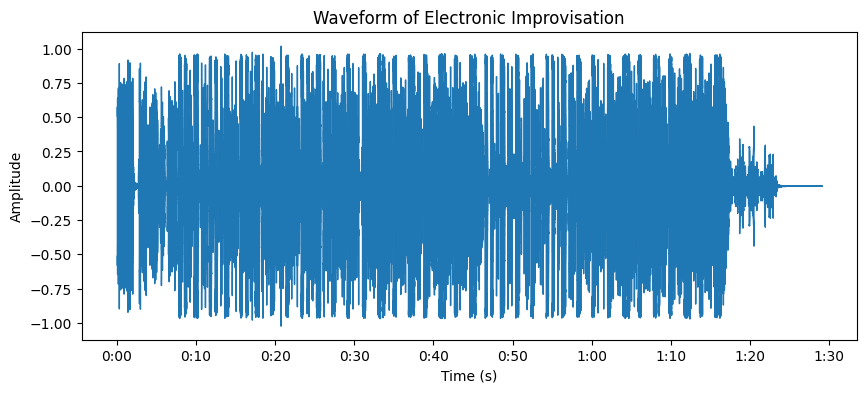

In [110]:
# Plot the Waveform of the Electronic Improvisation

plt.figure(figsize=(10, 4))
plt.title("Waveform of Electronic Improvisation")
librosa.display.waveshow(y_el, sr=sr_el)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.savefig('waveform_electronic.png')

plt.show()

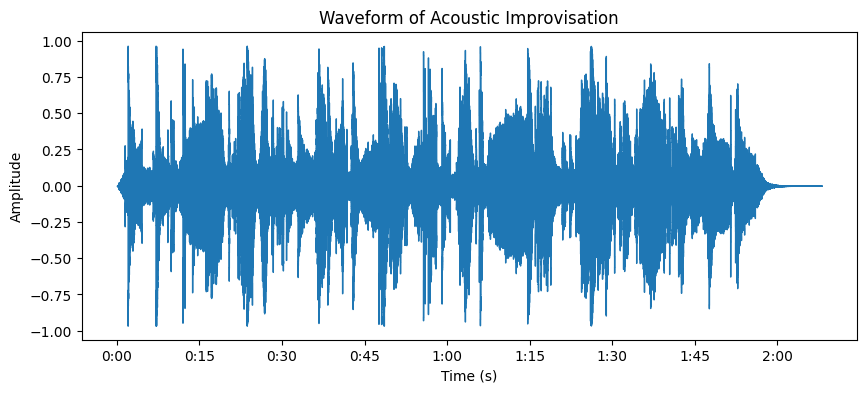

In [111]:
# Plot the Waveform of the Acoustic Improvisation

plt.figure(figsize=(10, 4))
plt.title("Waveform of Acoustic Improvisation")
librosa.display.waveshow(y_ac, sr=sr_ac)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.savefig('waveform_acoustic.png')

plt.show()

#### Comparing Onsets

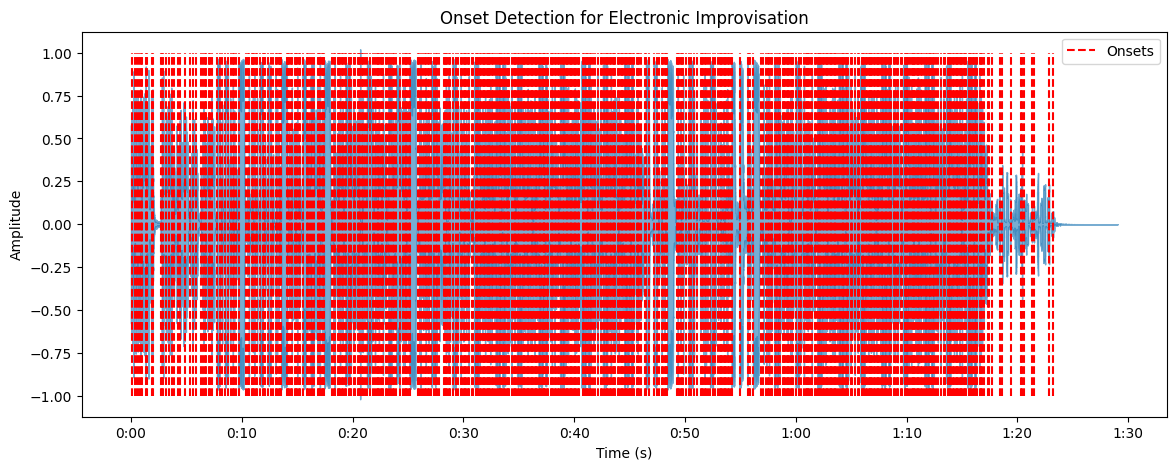

In [112]:
# Plot the waveform and highlight onsets of the Electronic Improvisation

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_el, sr=sr_el, alpha=0.6)
plt.vlines(onset_times_el, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Onset Detection for Electronic Improvisation')

plt.savefig('onset_electronic.png')

plt.show()

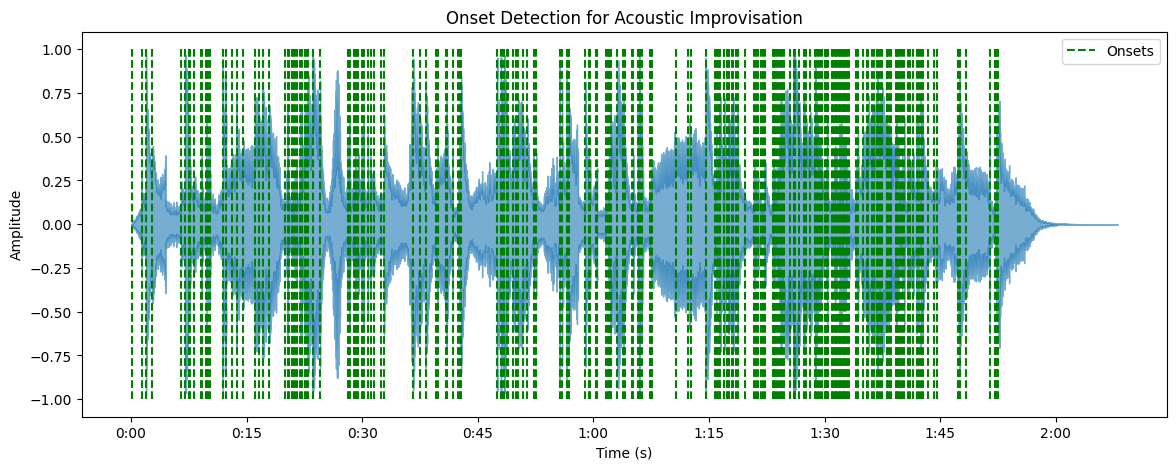

In [113]:
# Plot the waveform and highlight onsets of the Acoustic Improvisation

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_ac, sr=sr_ac, alpha=0.6)
plt.vlines(onset_times_ac, ymin=-1, ymax=1, color='g', linestyle='--', label='Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Onset Detection for Acoustic Improvisation')

plt.savefig('onset_acoustic.png')

plt.show()

#### Comparing Spectrograms

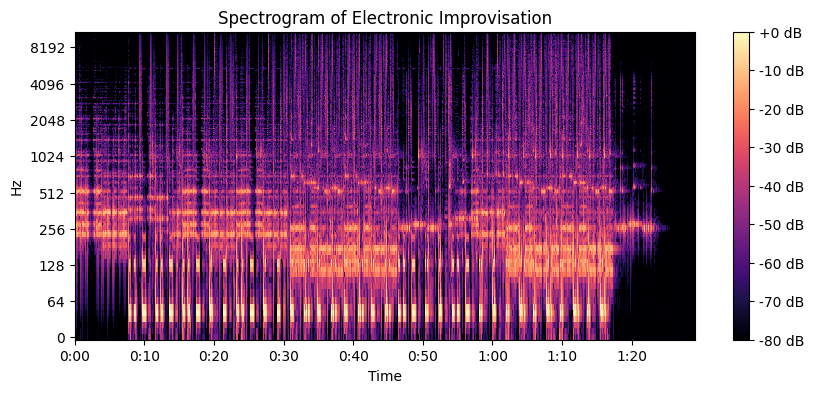

In [114]:
# Plot a Spectrogram of the Electronic Improvisation

plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_el)), ref=np.max)
librosa.display.specshow(D, sr=sr_el, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Electronic Improvisation')

plt.savefig('spectogram_electronic.png')

plt.show()


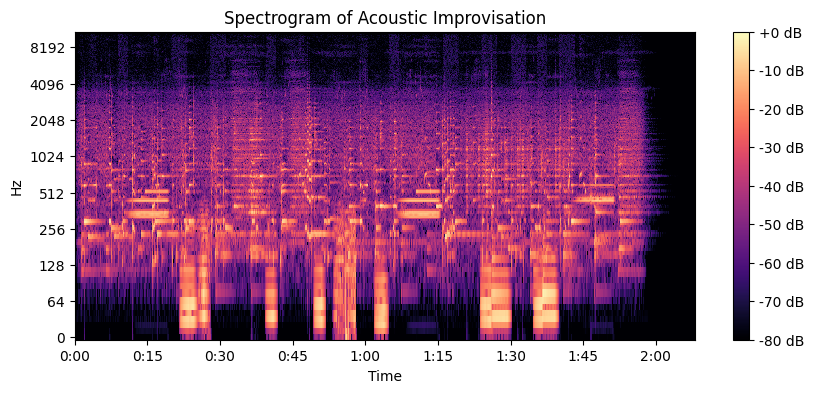

In [115]:
# Plot a Spectrogram of the Acoustic Improvisation

plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_ac)), ref=np.max)
librosa.display.specshow(D, sr=sr_ac, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Acoustic Improvisation')

plt.savefig('spectrogram_acoustic.png')

plt.show()


#### Comparing Chroma Features

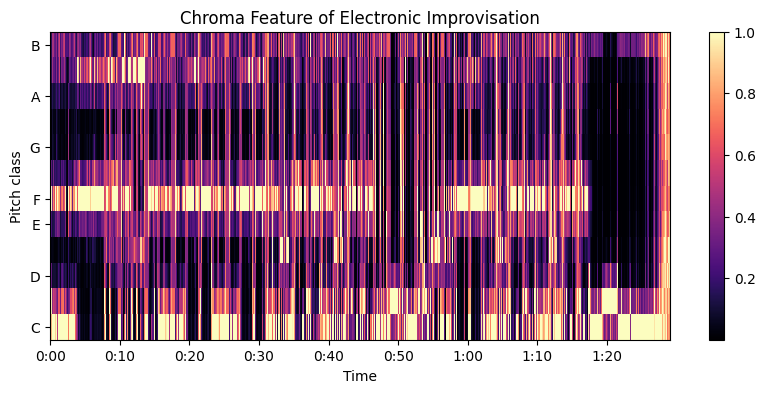

In [116]:
# Plot Chroma Feature of Electronic Improvisation

chroma_el = librosa.feature.chroma_stft(y=y_el, sr=sr_el)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_el, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Feature of Electronic Improvisation')

plt.savefig('chromafeatures_electronic.png')

plt.show()


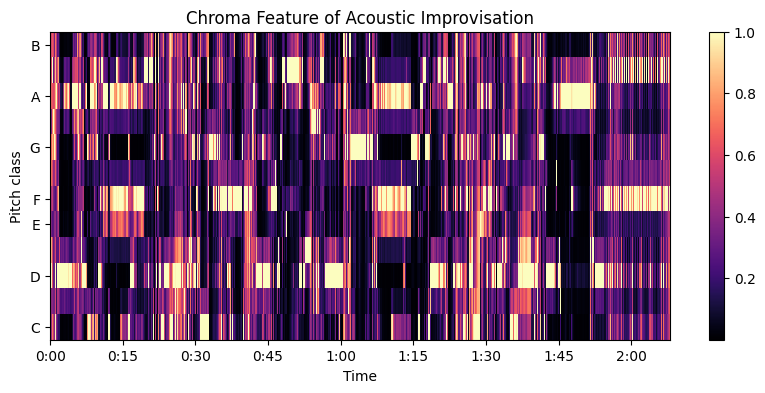

In [117]:
# Plot Chroma Feature of Acoustic Improvisation

chroma_ac = librosa.feature.chroma_stft(y=y_ac, sr=sr_ac)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_ac, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Feature of Acoustic Improvisation')

plt.savefig('chromafeatures_acoustic.png')

plt.show()


#### Comparing MFCC Visualizations

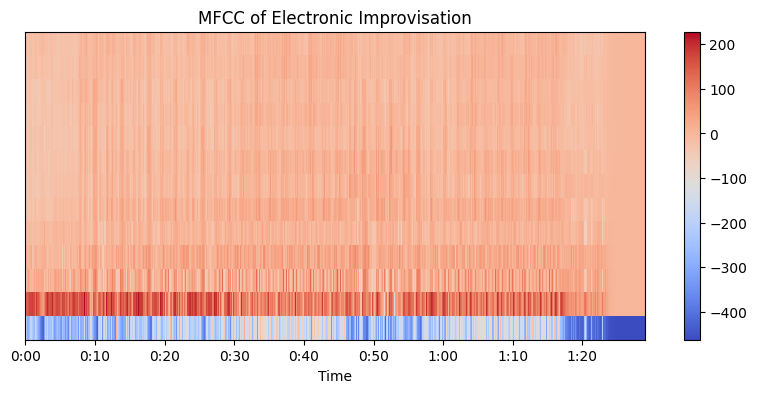

In [118]:
# Plot MFCC Visualization of Electronic Improvisation

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_el, x_axis='time')
plt.colorbar()
plt.title('MFCC of Electronic Improvisation')

plt.savefig('mfcc_electronic.png')

plt.show()


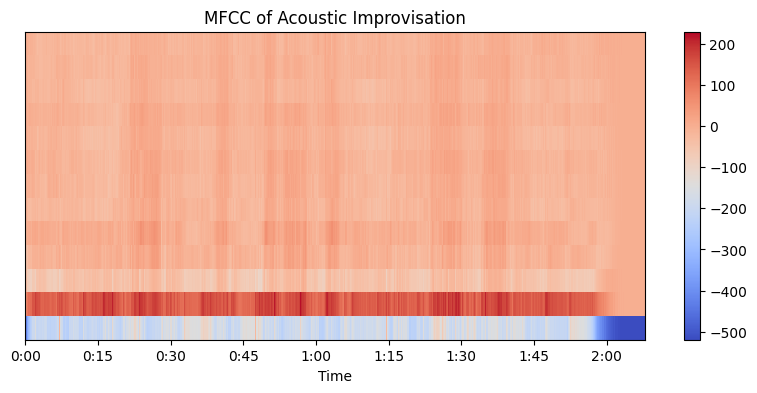

In [119]:
# Plot MFCC Visualization of Acoustic Improvisation

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_ac, x_axis='time')
plt.colorbar()
plt.title('MFCC of Acoustic Improvisation')

plt.savefig('mfcc_acoustic.png')

plt.show()

#### Comparing Spectral Centroid Visualizations

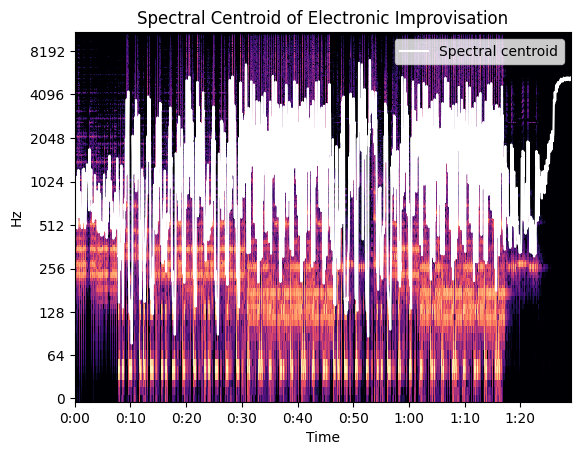

In [120]:
# Plot Spectogram and Spectral Centroid of Electronic Improvisation

times_el = librosa.times_like(spectral_centroids_el)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S_el, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times_el, spectral_centroids_el.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral Centroid of Electronic Improvisation')

plt.savefig('spectralcentroid_electronic.png')

plt.show()


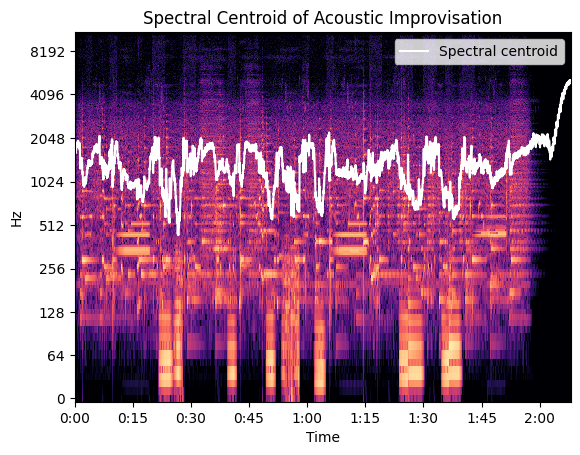

In [121]:
# Plot Spectogram and Spectral Centroid of Acoustic Improvisation

times_ac = librosa.times_like(spectral_centroids_ac)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S_ac, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times_ac, spectral_centroids_ac.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral Centroid of Acoustic Improvisation')


plt.savefig('spectralcentroid_acoustic.png')

plt.show()


#### Comparing RMS Energy Values

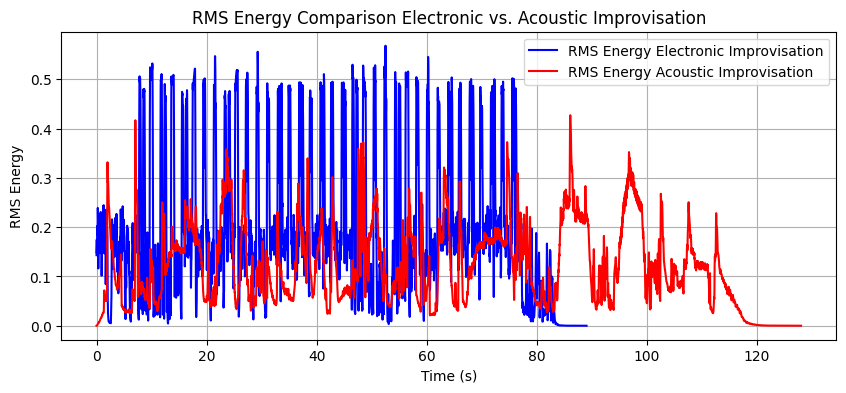

In [122]:
# Create time array necessary for plotting for both improvisations
frames_el = range(rms_el.shape[1])
t_el = librosa.frames_to_time(frames_el)

frames_ac = range(rms_ac.shape[1])
t_ac = librosa.frames_to_time(frames_ac)

# Plot both RMS-curves
plt.figure(figsize=(10, 4))
plt.plot(t_el, rms_el[0], label='RMS Energy Electronic Improvisation', color='blue')
plt.plot(t_ac, rms_ac[0], label='RMS Energy Acoustic Improvisation', color='red')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.title('RMS Energy Comparison Electronic vs. Acoustic Improvisation')
plt.legend()
plt.grid()

plt.savefig('rms_energy_comparison.png')

plt.show()